In [5]:
from google.colab import files
uploaded = files.upload()


Saving 1000_Companies.csv to 1000_Companies (1).csv


In [29]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [27]:
df = pd.read_csv("1000_Companies.csv")

In [8]:
# Drop duplicates if any
df = df.drop_duplicates()

In [9]:
# Define features and target
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [10]:
# Identify categorical columns
categorical_features = ["State"]

In [28]:
# Create ColumnTransformer for OneHotEncoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

# Create the complete pipeline with preprocessing + regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])




In [12]:
# Create pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [13]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
# Fit the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

In [15]:
# Extract model parameters
model = pipeline.named_steps["regressor"]
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
coefficients = pd.Series(model.coef_, index=feature_names)
intercept = model.intercept_

In [16]:
# Show model parameters
print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)


Intercept: -72928.16541380523

Coefficients:
cat__State_Florida           -741.383709
cat__State_New York           161.002487
remainder__R&D Spend            0.575759
remainder__Administration       1.062760
remainder__Marketing Spend      0.066478
dtype: float64


In [17]:
# Predict on test data
y_pred = pipeline.predict(X_test)


In [18]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Evaluation Metrics:
MSE: 25599473.848607637
RMSE: 5059.592261102433
R² Score: 0.9834485559493108


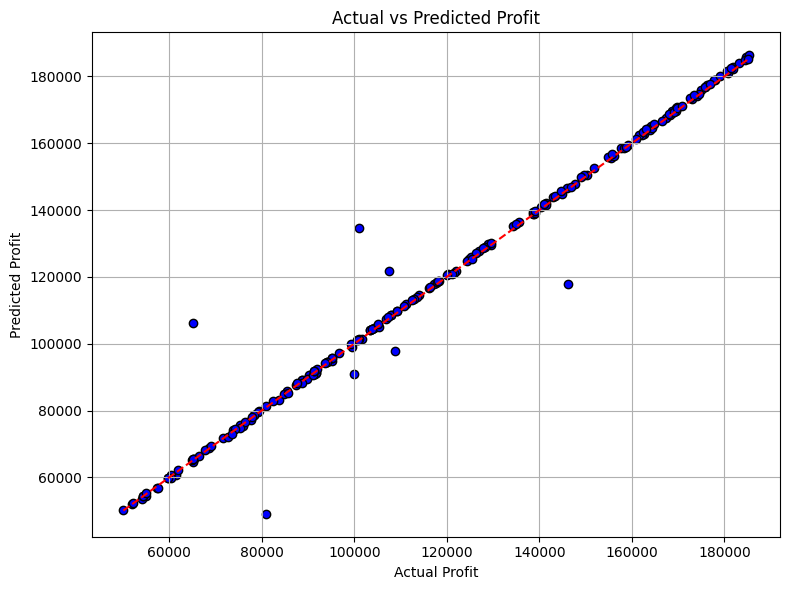

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.tight_layout()
plt.show()